## Name: Mayuri Patel, Email: mpate131@uncc.edu

# 1. Introduction

For this project we were asked to select a dataset and using the data answer a question of our choosing. I selected the Gene Expression profiling between UK and Sri Lankan Oral Squamous Cell Carcinoma (oral Cancer). It includes the expression level of genes and sample ID from UK and SL. This dataset has two different files -control and disease (oral cancer).

After looking at the content of the dataset, I thought it would be interesting to look at the following questions:

1. Comparing the mean gene expression of different genes in smoking Vs non-smoking cancer Vs control group?
2. Is the gene expression levels differ in the gender of UK and SL groups?
3. Plot the Foldchange and mean expression levels of genes to visualize up and downregulated genes.
4. Generating heatmap of Normal and Cancer group (oral squamous cell carcinoma).

# 2. Setting up report

In order to analyse and report the analysis, I use jupyter notebook, along with pandas, matplotlib.pyplot, and R-studio (ggplot2). In order to use these modules they needed to be imported into the notebook first.

In [1]:
#importing of required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# loading R with python
%load_ext rpy2.ipython

In [4]:
#loading the libraries in R
%%R
# for visualization
library("ggplot2")
library("gplots")

UsageError: Line magic function `%%R` not found.


# 3. Read CSV into dataframe

reading cancer data

In [5]:
# Read csv into Pandas Dataframe and store in dataset variable.
cancer_data = pd.read_csv("GSE51010Data.csv")

reading control (normal) data

In [6]:
# Read csv into Pandas Dataframe and store in dataset variable.
normal_data = pd.read_csv("NormSample.csv")

reading Fold Change values of Genes 

In [7]:
# Read csv into Pandas Dataframe and store in dataset variable.
gene_FChange = pd.read_csv("geneFCvalue.csv")

# 4. Data Cleaning and Parsing

Before working with the data I have to look at what needed to be cleaned up, i.e. find missing data, remove data that will not assist with the analysis.

Parsing the Cancer Data file containing the sample ID and gene expressions for up regulated genes:

In [8]:
# In the text file all up-regulated genes are present and converted into a list.
newlist = []
#opening the text file of up-regulated genes
upReg_gene = open("Upreg_gene.txt")
#for loop the genes and save it in the list
for s in upReg_gene:
    newlist.append(s.rstrip("\n")) # appending in the list
    
    
# match the genes from list to cancer data and set the index as ID
upreg_gene = cancer_data[cancer_data['ID'].isin(newlist)].set_index("ID")

Parsing the Cancer Data file containing the sample ID and gene expressions for down regulated genes:

In [9]:
#In the text file all down-regulated genes are present and converted into a list.
newlist_down = []
#opening the text file of down-regulated genes
downReg_gene = open("Downreg_gene.txt")
#for loop the genes and save it in the list
for s in downReg_gene:
    newlist_down.append(s.rstrip("\n")) #appending the list
    

# match the genes from list to cancer data ans set the index as ID
downreg_gene = cancer_data[cancer_data['ID'].isin(newlist_down)].set_index("ID")

combining the two dataframes into one final cancer data:

In [10]:
# Join the up and down regulated genes list to final data for use....
#sorting the index 
final_cancerData = pd.concat([upreg_gene,downreg_gene]).reset_index().sort_values("ID")

Parsing the normal sample data file:

In [11]:
# Here, storing a list of gene id from final cancer data to match it with normal sample data
Id_list = final_cancerData["ID"].tolist() 

#matched and stored into a new dataframe
final_normalData= normal_data[normal_data["ID"].isin(Id_list)]

Adding few more columns in the cancer data:

In [12]:
# I added columns of variables that can be used for data analysis are taken from the paper/article.
oralcancer = pd.read_csv("OrgCancer_data.csv")
oralcancer

,ID,Country,Gender,Smoking,200000_s_at,200015_s_at,200033_at,200036_s_at,200044_at,200056_s_at,...,34031_i_at,35436_at,35666_at,36711_at,36936_at,39248_at,39249_at,39729_at,57163_at,57588_at
0,GSM1234787,UK,M,Yes,6.865424,8.701370,7.925111,9.621891,8.844941,5.166318,...,4.538956,7.552981,8.814372,7.706258,6.763535,9.725343,8.114121,6.871100,7.027942,5.783214
1,GSM1234788,UK,F,No,8.126370,9.348554,10.510425,10.944133,8.802352,5.395476,...,6.119497,6.566037,8.844699,5.432036,7.148468,10.619367,8.975036,6.882787,6.707748,5.400044
2,GSM1234789,UK,F,No,7.676514,9.105779,10.193666,10.708437,9.058279,4.903535,...,4.906397,7.170812,9.002796,5.835444,7.559877,10.545996,8.677895,9.099772,7.770612,5.483929
3,GSM1234790,UK,F,No,6.821800,8.791512,9.123737,10.571662,8.758035,4.997521,...,4.792282,7.538552,8.576042,6.701487,6.873141,10.236432,8.900838,7.515125,6.961125,5.640109
4,GSM1234791,UK,F,Yes,7.925917,9.203507,10.881160,10.982852,8.607971,4.943475,...,4.306889,7.198780,9.308901,6.348665,8.268467,11.786694,9.571089,8.332601,7.388295,6.422859
5,GSM1234792,UK,F,No,7.233684,9.050077,10.019483,10.003632,8.359064,5.019481,...,4.900232,7.725113,9.413174,7.067228,8.830722,12.266443,10.252256,7.419787,6.939378,5.912861
6,GSM1234793,UK,F,Yes,8.494584,9.133874,11.230459,10.713894,9.154354,5.108797,...,4.460115,6.973817,8.812532,8.043001,7.855918,12.542904,11.040269,8.193200,7.802495,5.820075
7,GSM1234794,UK,F,Yes,7.717449,8.268026,10.231594,11.541356,8.837880,5.022043,...,5.512278,7.407862,9.191878,6.343569,6.665663,8.067101,8.167300,7.473281,6.132642,5.324981
8,GSM1234795,UK,M,Yes,7.235896,9.145033,9.639507,9.881247,8.240379,5.178664,...,4.622087,7.932242,9.073591,6.856792,7.254259,10.967940,8.701510,6.458042,6.759855,5.754264
9,GSM1234796,UK,M,Yes,8.415988,8.953180,9.745815,10.142090,8.894103,4.525842,...,4.978997,7.454633,9.221008,7.710347,8.047656,11.414115,9.547263,8.751367,7.566197,6.746641


# 5. Analysis of Data

## 1. Comparing the mean gene expression of different genes in smoking Vs non-smoking cancer Vs control groups?

 Here, I use the cancer and normal sample data to compare for

In [13]:
#The cancer data is subsetted into smoking and non-smoking sample group:
#They are mentioned as yes or no.
smoking_Data = oralcancer[oralcancer.Smoking == "Yes"]
nonSmoking_Data = oralcancer[oralcancer.Smoking == "No"]

In [14]:
#Calculated the mean from both smoking and non-smoking cancer data and transpose.
mean_Sdata = smoking_Data.groupby("Smoking").mean().T
mean_NonSData = nonSmoking_Data.groupby("Smoking").mean().T

In [15]:
#The normal sample data is taken that contains only non-smoking samples ...
#The dataset is formatted to make sure of it by transposing.
normalData = final_normalData.set_index("ID").T
#Converted into the dataframe to calculate the mean values.
mean_normalData = pd.DataFrame(normalData.mean()) # calculated the mean values of all the genes

Text(0, 0.5, 'Mean Gene Expression Levels')

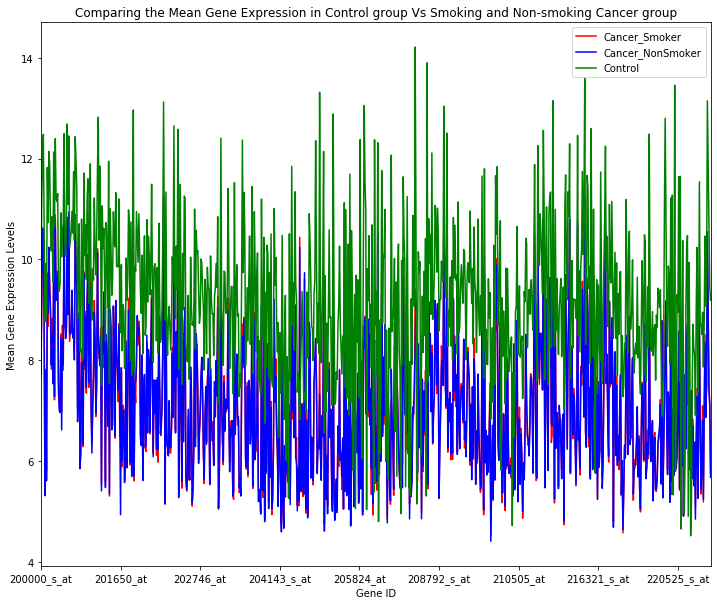

In [16]:
#Combined all the three output parsed data into one for cancer smoking, non-smoking, and normal sample
combine_data = pd.concat([mean_Sdata,mean_NonSData,mean_normalData],axis =1,sort = False)

#Rename the columns for better understanding...
colNames = combine_data.rename(columns={"Yes":"Cancer_Smoker","No":"Cancer_NonSmoker",0:"Control"})

#Plot a line graph to visualize the gene expressions in all the three groups.
plot_smoking = colNames.plot(kind="line",figsize=(12,10),color = ["red","blue","green"],title="Comparing the Mean Gene Expression in Control group Vs Smoking and Non-smoking Cancer group")
plot_smoking.set_xlabel("Gene ID") # adding x-axis label
plot_smoking.set_ylabel("Mean Gene Expression Levels") # adding y-axis label

Result: The mean gene expression levels are almost similar in smoker and non-smoker cancer group, However, the control group shows the highest gene expression level from all the three groups. Therefore, I can say that smoking plays a vital role in oral cancer for changing the gene expression. It is one of the factor that can contribute for oral cancer, besides, betel nut chewing.

## 2. Is the gene expression levels differ in the gender of UK and SL groups?

Here, Subset the data into UK ang SL gender:

subset by UK gender:

In [17]:
# Subset the data into UK and then again into male and female
country_UK = oralcancer[oralcancer.Country == "UK"]

#Based on Gender:
male_UK = country_UK[country_UK.Gender == "M"]
female_UK = country_UK[country_UK.Gender == "F"]

In [18]:
#Calculating mean gene expressions in both the gender group
#Here, set the index as gender and select all columns required for mean calculation.
expUK_male = male_UK.set_index("Gender").iloc[:,3:845].mean()
expUK_female = female_UK.set_index("Gender").iloc[:,3:845].mean()

In [19]:
#As the data is not normally distributed it is log transformed
#log2 transforms the data using numpy.
logUK_male = np.log2(expUK_male)
logUK_female = np.log2(expUK_female)

subset by SL gender:

In [20]:
#Subset the data into SL and then again into male and female
country_SL = oralcancer[oralcancer.Country == "Sri Lankan"]

##Based on Gender:
male_SL = country_SL[country_SL.Gender == "M"]
female_SL = country_SL[country_SL.Gender == "F"]

In [21]:
#Calculating mean gene expression in both the gender group
##Here, set the index as gender and select all columns required for mean calculation.
expSL_male = male_SL.set_index("Gender").iloc[:,3:845].mean()
expSL_female = female_SL.set_index("Gender").iloc[:,3:845].mean()

In [22]:
#As the data is not normally distributed it is log transformed
#log2 transformed the data using numpy.
logSL_male = np.log2(expSL_male)
logSL_female = np.log2(expSL_female)

Scatter plot is generated for UK and SL Gender:

Text(0, 0.5, 'Log2 female gene expression')

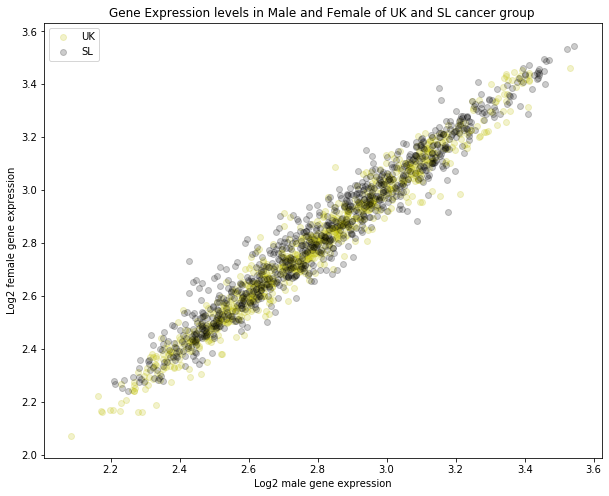

In [23]:
#plotting gene expression levels of UK and SL group- male  and female.
#set the figure size
plt.figure(figsize=(10,8))
plt.scatter(logUK_male,logUK_female,c="y",alpha=0.2,label= "UK") #scatter plot of UK
plt.scatter(logSL_male,logSL_female,c="k",alpha=0.2,label= "SL") # scatter plot of SL

#Add the labels
plt.title("Gene Expression levels in Male and Female of UK and SL cancer group ") # adding title
plt.legend(loc='upper left') # location of label
plt.xlabel('Log2 male gene expression') # adding x-axis
plt.ylabel('Log2 female gene expression') # adding y-axis

Result: From this scatter plot, I can say that the gene expression levels in male and female are almost similiar in both the countries. Therefore, the gene expression profiling is similar between UK and SL OSCC.

## 3.Plot the Foldchange and mean expression values of different genes to visualize up and downregulated genes

In [24]:
#Take gene fold change data file and sort it to match it with oral cancer data file
geneFC = gene_FChange.sort_values("Gene ID").set_index("Gene ID")

#oral cancer data is log2 transformed and then calculated the mean values of all the genes
log2CancerData = np.log2(oralcancer.iloc[:,4:846])
meanCancerData = log2CancerData.mean()

#Join above two variables to produce a dataframe containing fold change values and mean gene expression of all the genes.
geneData_FM = pd.concat([geneFC, meanCancerData], axis=1, sort=False)

#Change the column names
geneFC_mean = geneData_FM.rename(columns={"Fold Change":"FoldChange",0:"baseMean"})

In [ ]:
#Loading R with python to pass the file to R environment.
#The R environment is loaded here which takes in the variable to read in.

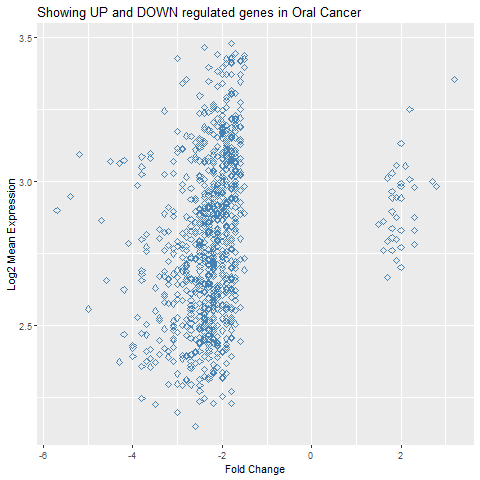

In [28]:
%%R -i geneFC_mean

#Importing the library.
library("ggplot2")


#Plot the data by specifying the x and y axis.
#Here, ggplot is plotted with geom point and title
plot = ggplot(geneFC_mean, aes(x=FoldChange, y=baseMean)) + geom_point(size=2, shape=23,color="steelblue") #selecting the size and shape of points
plot + ggtitle("Showing UP and DOWN regulated genes in Oral Cancer") + xlab("Fold Change") + ylab("Log2 Mean Expression") # adding title and x and y-axis

Result: The ggplot shows all the genes and classified them into up and down regulated based on fold change values. If FC < 0, then that genes are downregulated and if FC > 0 then those genes are upregulated. Seeing at the plot, I can say that downregulated genes are more in number over upregulated one.

## 4. Generating heatmap between Cancer and Normal sample groups.

cancer data

In [29]:
#Here, parsing file by selecting all the genes and samples for visualization
cancerdata =oralcancer.set_index("ID").iloc[:,3:845]

Control (normal) data

In [30]:
#Parsed file of normal dataset is transpose to look similar to cancer data.
normaldata = final_normalData.set_index("ID").T

Using R with python

Heatmap of cancer data

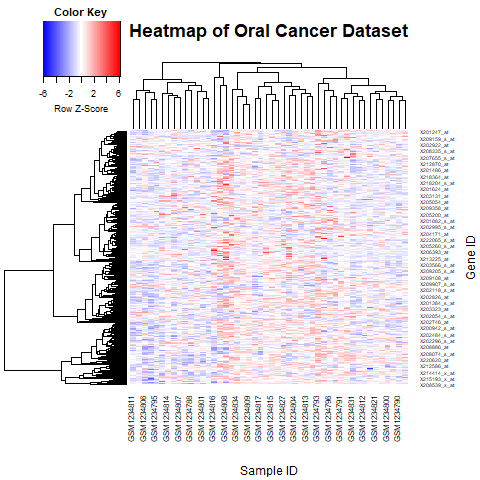

In [31]:
%%R -i cancerdata  # passing the cancer data

#Importing the library for heatmap
library("gplots")

#To generate heatmap, the dataframe file is converted into matrix and transpose
OC_data = t(as.matrix(cancerdata))

#Generating a heatmap by selecting the color of heatmap and adding key and margins
#Adding the labels
heatmap.2(OC_data, col = bluered(100), scale="row",
           key=TRUE, symkey=FALSE, density.info="none", trace="none", cexRow=0.5,margins = c(8,6),
        main="Heatmap of Oral Cancer Dataset", xlab="Sample ID" ,ylab="Gene ID" ) 


Heatmap of Normal(control) Data

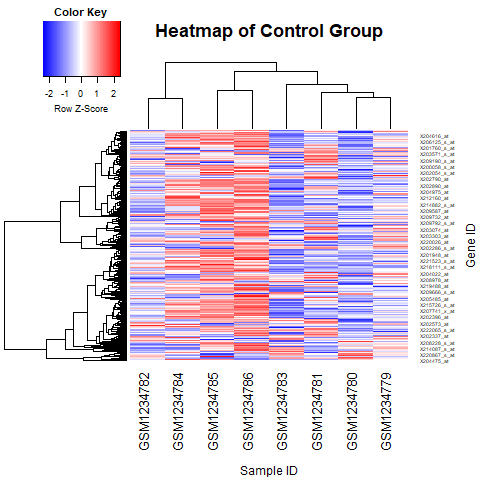

In [32]:
%%R -i normalData #passing control group data

#To generate heatmap, the dataframe file is converted into matrix and transpose
N_data = t(as.matrix(normalData))

#Generating a heatmap by selecting the color of heatmap and adding key and margins
#Adding the labels
heatmap.2(N_data,col = bluered(100), scale="row",
           key=TRUE, symkey=FALSE, density.info="none", trace="none", cexRow=0.5,margins= c(10,6),
            main="Heatmap of Control Group", xlab="Sample ID" ,ylab="Gene ID")

The heatmap shows the intensity of various genes in each sample of control and oral cancer group. I generated these heatmaps for visualization of gene expression in each and every sample.